## Crime Investigation in the City of Chicago
#### https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2

In [1]:
# Set Environment
setwd("C:\\Users\\SROY\\Documents\\CodeBase\\Datasets\\Clarity")
rm(list=ls())
seedVal = 17869
options(warn=-1)
options(scipen=999)

In [62]:
# Load Data
DataDump <- read.csv2("Crimes_-_2001_to_present.csv", header = TRUE, sep = ',')

# Backup full data
crimeFullData <- DataDump
names(DataDump)

[1] "ID"                   "Case.Number"          "Date"                
 [4] "Block"                "IUCR"                 "Primary.Type"        
 [7] "Description"          "Location.Description" "Arrest"              
[10] "Domestic"             "Beat"                 "District"            
[13] "Ward"                 "Community.Area"       "FBI.Code"            
[16] "X.Coordinate"         "Y.Coordinate"         "Year"                
[19] "Updated.On"           "Latitude"             "Longitude"           
[22] "Location"             "Report_Month"         "Report_Hour"         
[25] "Report_Wday"          "Report_Day"

In [3]:
head(crimeFullData)

ID,Case.Number,Date,Block,IUCR,Primary.Type,Description,Location.Description,Arrest,Domestic,...,Ward,Community.Area,FBI.Code,X.Coordinate,Y.Coordinate,Year,Updated.On,Latitude,Longitude,Location
2112204,HH348122,05/03/2002 04:30:00 PM,087XX S LAFAYETTE AVE,0820,THEFT,$500 AND UNDER,DEPARTMENT STORE,false,false,...,21,44,06,1177462,1847094,2002,04/15/2016 08:55:02 AM,41.735752519,-87.625429032,"(41.735752519, -87.625429032)"
2112206,HH348149,05/03/2002 09:30:00 PM,001XX W 35TH ST,0820,THEFT,$500 AND UNDER,CTA PLATFORM,false,false,...,11,34,06,1175739,1881773,2002,04/15/2016 08:55:02 AM,41.830954079,-87.630703226,"(41.830954079, -87.630703226)"
2112207,HH347497,05/03/2002 02:00:00 PM,003XX W WEBSTER AVE,0810,THEFT,OVER $500,OTHER,false,false,...,43,7,06,1173608,1914927,2002,04/15/2016 08:55:02 AM,41.921978375,-87.6375358,"(41.921978375, -87.6375358)"
2112208,HH348158,05/03/2002 10:30:00 PM,067XX S RACINE AVE,4387,OTHER OFFENSE,VIOLATE ORDER OF PROTECTION,RESIDENCE,true,true,...,17,68,26,1169482,1860059,2002,04/15/2016 08:55:02 AM,41.771506608,-87.654289829,"(41.771506608, -87.654289829)"
2112209,HH348108,05/03/2002 07:00:00 PM,032XX W 112TH PL,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,false,false,...,19,74,07,1156621,1829814,2002,04/15/2016 08:55:02 AM,41.688778142,-87.702247084,"(41.688778142, -87.702247084)"
2112213,HH348197,05/03/2002 06:00:00 PM,098XX S CHARLES ST,0560,ASSAULT,SIMPLE,STREET,false,true,...,19,72,08A,1167548,1839457,2002,04/15/2016 08:55:02 AM,41.715013468,-87.661968417,"(41.715013468, -87.661968417)"


In [4]:
# Let's check the structure of data
str(crimeFullData)

'data.frame':	6455332 obs. of  22 variables:
 $ ID                  : int  2112204 2112206 2112207 2112208 2112209 2112213 2112215 2112216 2112217 2112218 ...
 $ Case.Number         : Factor w/ 6454954 levels "","01G050460",..: 635058 635077 634705 635083 635049 635113 635231 624285 624424 635142 ...
 $ Date                : Factor w/ 2567672 levels "01/01/2001 01:00:00 AM",..: 839001 839218 838909 839270 839100 839058 781284 744781 774191 839351 ...
 $ Block               : Factor w/ 59157 levels "0000X E 100 PL",..: 53374 1889 3839 47241 26566 55215 12803 32617 9010 37126 ...
 $ IUCR                : Factor w/ 401 levels "0110","0141",..: 92 92 91 356 105 81 314 91 87 161 ...
 $ Primary.Type        : Factor w/ 35 levels "ARSON","ASSAULT",..: 34 34 34 26 18 2 26 34 4 8 ...
 $ Description         : Factor w/ 379 levels "$300 AND UNDER",..: 2 2 256 369 88 316 178 256 161 339 ...
 $ Location.Description: Factor w/ 174 levels "","ABANDONED BUILDING",..: 75 67 121 136 156 156 94 95 137 36 

### Data Cleaning and Manipulation

In [5]:
# IUCR codes Illinois Uniform Crime Reporting (IUCR) codes are four digit codes that law enforcement agencies use to classify criminal incidents when taking individual reports.
# Column Primary.Type and Description describes the codes.
# Check duplicate ID if any
stopifnot(length(unique(crimeFullData$ID)) == nrow(crimeFullData))

In [6]:
# Check duplicate Case Number if any
stopifnot(length(unique(trimws(crimeFullData$Case.Number))) == nrow(crimeFullData))

ERROR: Error: length(unique(trimws(crimeFullData$Case.Number))) == nrow(crimeFullData) is not TRUE


In [7]:
# There are 378 duplicate Case Numbers. Let's investigate
library(dplyr)
dupCase <- crimeFullData %>% count(trimws(Case.Number)) %>% filter(n>1)
dupCasedf <- crimeFullData[crimeFullData$Case.Number %in% c(dupCase$`trimws(Case.Number)`),]
dupCasedf <- dupCasedf[order(dupCasedf$Case.Number),]
# 4 missing case numbers. Not much of a concern
# Duplicate case numbers. Duplicate records are mostly the same except the approximate time
# of occurence is different. An very few other changes. Looks like the record has been
# updated and got inserted as a new record. We can assume the updated one as the correct one.


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [8]:
# We will remove the lesser id from duplicate records.
removeID <- dupCasedf %>% filter(Case.Number != "") %>%
  select(ID, Case.Number) %>% 
  group_by(Case.Number) %>% 
  summarise(delID = min(ID))
crimeFullData <- crimeFullData[!crimeFullData$ID %in% c(removeID$delID),]

In [26]:
# We can use the "Missing Map" to look at the distribution of missing data over each row
library(Amelia)
jpeg(filename="missmap.jpg")
missmap(crimeFullData, main = "Missing values ")
dev.off()
# Community area, Ward are highly missing. Xcoord, Y coord

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2017 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


In [9]:
# Check missing lat long. Missing location is make no sense at all.
# Create subset of only locations
crimeFullDataLoc <- crimeFullData[,c('ID','X.Coordinate','Y.Coordinate',
                                     'Latitude','Longitude','Location')]
apply(crimeFullDataLoc, 2, function(x) length(which(x == "" | is.na(x) | x == "NA")))
# 85138 missing locations which is 1.31%

ID X.Coordinate Y.Coordinate     Latitude    Longitude     Location 
           0        85138        85138        85138        85138        85138

In [10]:
missLocdf <- crimeFullData[is.na(crimeFullData$X.Coordinate),]
# Too many missing records. We can impute using KNN. But we must ensure we have
# other columns in order to perform KNN.
apply(missLocdf, 2, function(x) length(which(x == "" | is.na(x) | x == "NA")))
# We noticed 9355 rows have missing ward and community area. So, location cannot be retrived.

ID          Case.Number                 Date 
                   0                    1                    0 
               Block                 IUCR         Primary.Type 
                   0                    0                    0 
         Description Location.Description               Arrest 
                   0                  868                    0 
            Domestic                 Beat             District 
                   0                    0                    0 
                Ward       Community.Area             FBI.Code 
                9252                 9355                    0 
        X.Coordinate         Y.Coordinate                 Year 
               85138                85138                    0 
          Updated.On             Latitude            Longitude 
                   0                85138                85138 
            Location 
               85138

In [11]:
# Removing all missing locations for the time being. Will be revisited.
crimeFullData <- crimeFullData[!crimeFullData$ID %in% c(missLocdf$ID),]

# Now let's verify again if anything else is missing.
# This query will take time. We must optimize it with relevant columns.
excludeList <- c('ID','Case.Number','X.Coordinate','Y.Coordinate','Updated.On','Latitude',
                 'Longitude','Location','Primary.Type','Year','Date')
includeList <- names(crimeFullData[!names(crimeFullData) %in% c(excludeList)])
apply(crimeFullData[,includeList], 
      2, function(x) length(which(x == "" | is.na(x) | x == "NA")))

Block                 IUCR          Description 
                   0                    0                    0 
Location.Description               Arrest             Domestic 
                1970                    0                    0 
                Beat             District                 Ward 
                   0                   49               605590 
      Community.Area             FBI.Code 
              606663                    0

In [12]:
# Location description is missing. We can encode it to a new value (NOT RECORDED)
levels(crimeFullData$Location.Description) <- c(levels(crimeFullData$Location.Description), 'NOT RECORDED')
crimeFullData[is.na(crimeFullData$Location.Description),'Location.Description'] <- 'NOT RECORDED'

In [13]:
# Fix missing district, ward, community area using KNN.
library(VIM)
# We notice summary shows the number of NA's
excludeList <- c('ID','Case.Number','Updated.On','Latitude', 'Primary.Type', 'Description',
                 'Longitude','Location','Date')
includeList <- names(crimeFullData[!names(crimeFullData) %in% c(excludeList)])
summary(crimeFullData[,includeList])

Loading required package: colorspace
Loading required package: grid
Loading required package: data.table

Attaching package: 'data.table'

The following objects are masked from 'package:dplyr':

    between, first, last

VIM is ready to use. 
 Since version 4.0.0 the GUI is in its own package VIMGUI.

          Please use the package to use the new (and old) GUI.

Suggestions and bug-reports can be submitted at: https://github.com/alexkowa/VIM/issues

Attaching package: 'VIM'

The following object is masked from 'package:datasets':

    sleep



                  Block              IUCR        
 100XX W OHARE ST    :  14554   0820   : 514437  
 001XX N STATE ST    :  11111   0486   : 488146  
 076XX S CICERO AVE  :   8931   0460   : 481133  
 008XX N MICHIGAN AVE:   7693   1320   : 345820  
 0000X N STATE ST    :   7306   1310   : 338292  
 023XX S STATE ST    :   5177   0810   : 327548  
 (Other)             :6315119   (Other):3874515  
                     Location.Description   Arrest         Domestic      
 STREET                        :1689902   false:4576095   false:5540384  
 RESIDENCE                     :1069711   true :1793796   true : 829507  
 APARTMENT                     : 650528                                  
 SIDEWALK                      : 637145                                  
 OTHER                         : 238484                                  
 PARKING LOT/GARAGE(NON.RESID.): 183186                                  
 (Other)                       :1900935                                  
      Be

In [14]:
# kNN Imputation at K=5
apply(crimeFullData[,includeList], 2, function(x) length(which(is.na(x))))
crimeDataImputed <- kNN(crimeFullData[,includeList], variable = c('District'), k=5)

Block                 IUCR Location.Description 
                   0                    0                    0 
              Arrest             Domestic                 Beat 
                   0                    0                    0 
            District                 Ward       Community.Area 
                  49               605590               606663 
            FBI.Code         X.Coordinate         Y.Coordinate 
                   0                    0                    0 
                Year 
                   0

In [15]:
# Impute using Bing Tile System
# Use microsoft bing tile system to key lat and long
# Converts a point from latitude/longitude WGS-84 coordinates (in degrees) 
# into pixel XY coordinates at a specified level of detail.
crimeFullData <- crimeFullData[,!names(crimeFullData) %in% c('District_imp','TilesLonLat','LonTile','LatTile')]

MinLatitude = -85.05112878
MaxLatitude = 85.05112878
MinLongitude = -180
MaxLongitude = 180

clip <- function(n, minValue, maxValue){
  return(min(max(n, minValue), maxValue))}

latLongToTileXY <- function(latitude, longitude, levelOfDetail = 22){
  
  lat <- clip(latitude, MinLatitude, MaxLatitude)
  lon <- clip(longitude, MinLongitude, MaxLongitude)
  
  x <- (lon + 180) / 360
  sinLatitude <- sin(lat * pi / 180)
  y <- 0.5 - log((1 + sinLatitude) / (1 - sinLatitude)) / (4 * pi)
  
  mapsize <- bitwShiftL(256 , levelOfDetail)
  pixelXLon <- clip(x * mapsize + 0.5, 0, mapsize - 1)
  pixelYLat <- clip(y * mapsize + 0.5, 0, mapsize - 1)
  tileXLon <- as.integer(pixelXLon / 256)
  tileYLat <- as.integer(pixelYLat / 256) 
  
  return(paste0(tileXLon,'|',tileYLat))
}

In [16]:
# Convert lat long to Bing tile for better approximation
crimeFullData$Latitude <- as.numeric(as.character(crimeFullData$Latitude))
crimeFullData$Longitude <- as.numeric(as.character(crimeFullData$Longitude))
crimeFullData$TilesLonLat <- mapply(latLongToTileXY, crimeFullData$Latitude, crimeFullData$Longitude)
# Create new columns out of the above
library('tidyr')
crimeFullData <- separate(crimeFullData, TilesLonLat, 
                  c('LonTile', 'LatTile'),
                  sep="\\|",
                  remove=FALSE)

In [17]:
# Find what values to impute when a ward/community is missing.
# We can match Lat Long and impute with the median value 
medianWardCommunity <- crimeFullData %>% 
  select(Ward, Community.Area, LonTile, LatTile) %>% filter(!is.na(Ward) & !is.na(Community.Area)) %>%
  group_by(LatTile,LonTile) %>% summarise(medianWard = ceiling(median(Ward)), 
                                          medianCommunity = ceiling(median(Community.Area)))
# Impute Ward
crimeFullData$Ward[is.na(crimeFullData$Ward)] <- 
  medianWardCommunity$medianWard[match(crimeFullData$LatTile, medianWardCommunity$LatTile) & 
                                   match(crimeFullData$LonTile, medianWardCommunity$LonTile)]
# Impute Community Area
crimeFullData$Community.Area[is.na(crimeFullData$Community.Area)] <- 
  medianWardCommunity$medianWard[match(crimeFullData$LatTile, medianWardCommunity$LatTile) & 
                                   match(crimeFullData$LonTile, medianWardCommunity$LonTile)]

apply(crimeFullData, 2, function(x) length(which(is.na(x))))
# Still missing values. Cannot be imputed more
# Records needs to be removed prior to modelling.

ID          Case.Number                 Date 
                   0                    0                    0 
               Block                 IUCR         Primary.Type 
                   0                    0                    0 
         Description Location.Description               Arrest 
                   0                    0                    0 
            Domestic                 Beat             District 
                   0                    0                   49 
                Ward       Community.Area             FBI.Code 
              303566               304639                    0 
        X.Coordinate         Y.Coordinate                 Year 
                   0                    0                    0 
          Updated.On             Latitude            Longitude 
                   0                    0                    0 
            Location          TilesLonLat              LonTile 
                   0                    0                    0 
             LatTile 
                   0

In [18]:
# Remove NA records in Community Area and Ward.
crimeFullData <- crimeFullData %>% filter(!is.na(Community.Area)) %>% filter(Community.Area != 0)

excludeList <- c('ID','Case.Number','Updated.On','TilesLonLat','LonTile','LatTile',
                 'Location')
includeList <- names(crimeFullData[!names(crimeFullData) %in% c(excludeList)])
includeList
crimeFullData <- crimeFullData[,includeList]

[1] "Date"                 "Block"                "IUCR"                
 [4] "Primary.Type"         "Description"          "Location.Description"
 [7] "Arrest"               "Domestic"             "Beat"                
[10] "District"             "Ward"                 "Community.Area"      
[13] "FBI.Code"             "X.Coordinate"         "Y.Coordinate"        
[16] "Year"                 "Latitude"             "Longitude"

In [19]:
# Split date
library(lubridate)
crimeFullData <- crimeFullData %>% mutate(Report_Month = month(mdy_hms(Date)))
crimeFullData <- crimeFullData %>% mutate(Report_Hour = hour(mdy_hms(Date)))
crimeFullData <- crimeFullData %>% mutate(Report_Wday = wday(mdy_hms(Date)))
crimeFullData <- crimeFullData %>% mutate(Report_Day = day(mdy_hms(Date)))

DataDump <- DataDump %>% mutate(Report_Month = month(mdy_hms(Date)))
DataDump <- DataDump %>% mutate(Report_Hour = hour(mdy_hms(Date)))
DataDump <- DataDump %>% mutate(Report_Wday = wday(mdy_hms(Date)))
DataDump <- DataDump %>% mutate(Report_Day = day(mdy_hms(Date)))


Attaching package: 'lubridate'

The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from 'package:base':

    date



### Download Census Data

In [20]:
# Add census data
# Source : https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2
census <- read.csv2("Census_Data_-_Selected_socioeconomic_indicators_in_Chicago__2008___2012.csv", header = TRUE, sep = ',')

# Census data is from 2008-2012. We can take the rest of years with a pinch of salt
summary(census)

 Community.Area.Number     COMMUNITY.AREA.NAME PERCENT.OF.HOUSING.CROWDED
 Min.   : 1            Albany Park   : 1       1.1    : 4                
 1st Qu.:20            Archer Heights: 1       3.3    : 4                
 Median :39            Armour Square : 1       1.5    : 3                
 Mean   :39            Ashburn       : 1       3.8    : 3                
 3rd Qu.:58            Auburn Gresham: 1       4      : 3                
 Max.   :77            Austin        : 1       0.8    : 2                
 NA's   :1             (Other)       :72       (Other):59                
 PERCENT.HOUSEHOLDS.BELOW.POVERTY PERCENT.AGED.16..UNEMPLOYED
 13.2   : 2                       10     : 3                 
 14.7   : 2                       15.8   : 2                 
 15.3   : 2                       16.7   : 2                 
 17.2   : 2                       18.2   : 2                 
 18.7   : 2                       20     : 2                 
 19.2   : 2                       23

In [21]:
# Remove last total entry
census <- census[1:(nrow(census)-1),]

# Dividing the hardship index into quartiles (Income categories)
census$Income.Category <- cut(census$HARDSHIP.INDEX, breaks = c(-Inf, 25, 50, 75 ,Inf), 
                              labels = c("High","Medium","Low","Very Low"))

In [23]:
# Merge with main data
crimeFullData <- merge(x = crimeFullData, y = census, by.x = c("Community.Area"), 
                   by.y = c("Community.Area.Number"), all.x = TRUE)

### Download Weather Data

In [24]:
# Add weather data
# Source: https://www.wunderground.com/history/airport/KORD/2016/1/1/CustomHistory.html?dayend=1&monthend=10&yearend=2017&req_city=&req_state=&req_statename=&reqdb.zip=&reqdb.magic=&reqdb.wmo=
library("readxl")
wd <- read_xlsx("ChicagoWeather2014-17.xlsx", col_names = TRUE)
# Mark blank event as no Event
wd[is.na(wd$Events),'Events'] <- 'NoEvent'
wd$Events <- as.factor(trimws(wd$Events))
str(wd)

# Check meaningless values if any
apply(wd, 2, function(x) length(which(x == "" | is.na(x) | x == "NA" |  x == "-" | 
                                        x == " ")))

Classes 'tbl_df', 'tbl' and 'data.frame':	1391 obs. of  4 variables:
 $ Month : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Day   : num  1 2 3 4 5 6 7 8 9 10 ...
 $ Year  : num  2016 2016 2016 2016 2016 ...
 $ Events: Factor w/ 13 levels "Fog","Fog , Rain",..: 12 7 12 12 7 7 7 8 3 12 ...


Month    Day   Year Events 
     0      0      0      0

In [25]:
# Merge with main data
crimeFullData <- merge(x = crimeFullData, y = wd, by.x = c('Year','Report_Month','Report_Day'), 
                       by.y = c('Year','Month','Day'), all.x = TRUE)

In [27]:
# Select relevant columns
excludeList <- c(excludeList, 'Date', 'PERCENT.OF.HOUSING.CROWDED','HARDSHIP.INDEX',
                 'PER.CAPITA.INCOME','PERCENT.HOUSEHOLDS.BELOW.POVERTY',
                 'PERCENT.AGED.UNDER.18.OR.OVER.64','PERCENT.AGED.25..WITHOUT.HIGH.SCHOOL.DIPLOMA',
                 'PERCENT.AGED.16..UNEMPLOYED')
includeList <- names(crimeFullData[!names(crimeFullData) %in% c(excludeList)])
crimeFullData <- crimeFullData[,includeList]
names(crimeFullData)[names(crimeFullData) == 'Events'] <- 'WeatherEvent'

In [28]:
# Slice data from 2015. Recall domestic violence is fairly constant.
# Domestic violence cannot be stopped. Let's filter it out as well
crimedf <- crimeFullData %>% filter(Year > 2014 & Domestic == "false")

#### Create target variable. Crime type is divided into multiple categories according to FBI.
#### 1. Violent crimes: assault, battery, homicide, robbery, sexual assault.
#### 2. Property crimes: arson, burglary, motor vehicle theft, theft.
#### 3. Quality of life crimes: criminal damage, narcotics, prostitution. (None of these are index crimes.)
#### Creating a binary target(IndexCrime) if the record is a violent crime or not.

In [29]:
ViolentCrime <- c("ASSAULT", "BATTERY", "HOMICIDE", "ROBBERY", "CRIM SEXUAL ASSAULT")
crimedf <- mutate(crimedf, Index.Crime = ifelse(trimws(Primary.Type) %in% ViolentCrime, 1, 0))

# Check structure to verify datatypes
str(crimedf)

'data.frame':	595993 obs. of  25 variables:
 $ Year                : int  2015 2015 2015 2015 2015 2015 2015 2015 2015 2015 ...
 $ Report_Month        : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Report_Day          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Community.Area      : num  5 33 51 19 43 29 28 76 8 25 ...
 $ Block               : Factor w/ 59157 levels "0000X E 100 PL",..: 27134 10804 26201 17917 50716 11554 11996 5495 5770 37179 ...
 $ IUCR                : Factor w/ 401 levels "0110","0141",..: 160 92 92 249 250 176 210 103 41 126 ...
 $ Primary.Type        : Factor w/ 35 levels "ARSON","ASSAULT",..: 7 34 34 24 24 35 32 34 3 9 ...
 $ Description         : Factor w/ 379 levels "$300 AND UNDER",..: 344 2 2 124 5 351 127 168 316 163 ...
 $ Location.Description: Factor w/ 175 levels "","ABANDONED BUILDING",..: 152 95 121 136 136 121 136 4 27 136 ...
 $ Arrest              : Factor w/ 2 levels "false","true": 2 1 1 1 1 2 1 1 1 1 ...
 $ Domestic            : Factor w/ 2 levels "false","true": 1 1 1

## Visualizations

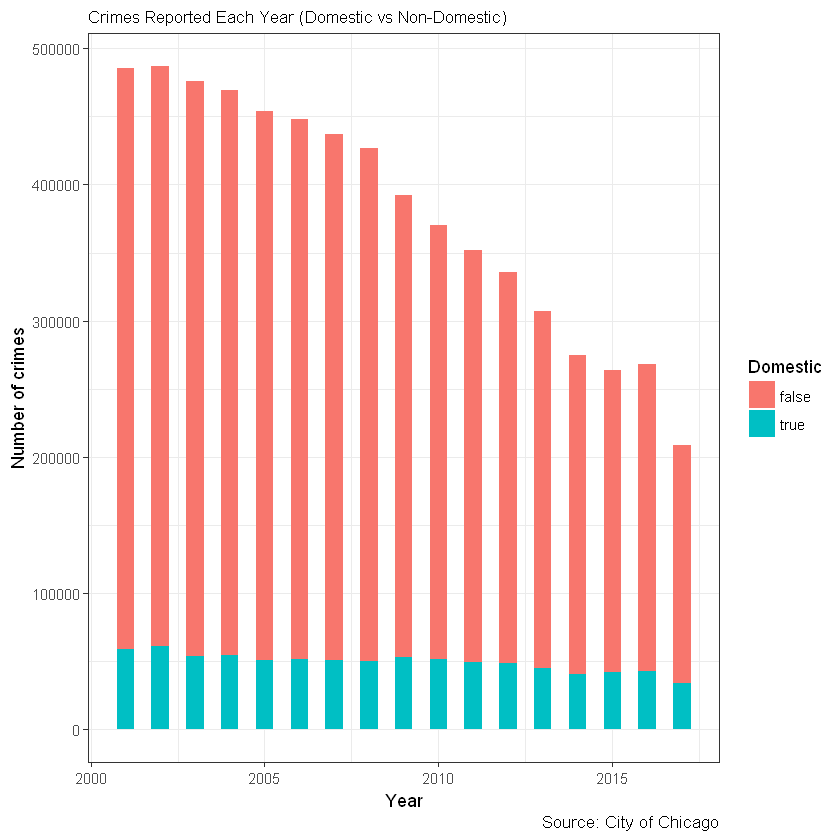

In [32]:
# Percentage of crime data each year
library(ggplot2)
theme_set(theme_bw())

yearCrimeRate <- DataDump %>% select(Year, Domestic) %>% 
  group_by(Year, Domestic) %>% count()
names(yearCrimeRate) <- c('Year','Domestic', 'Count')

ggplot(data = yearCrimeRate, mapping = aes(x = Year,y = Count, label = Count)) +
  geom_bar(stat="identity", aes(fill = Domestic), width=.5) +    
  labs(y = 'Number of crimes', 
       x = 'Year', 
       subtitle = 'Crimes Reported Each Year (Domestic vs Non-Domestic)', caption = "Source: City of Chicago") 
# Crimes gradually decreases but in 2016 there was an increase. 2017 is not over yet.

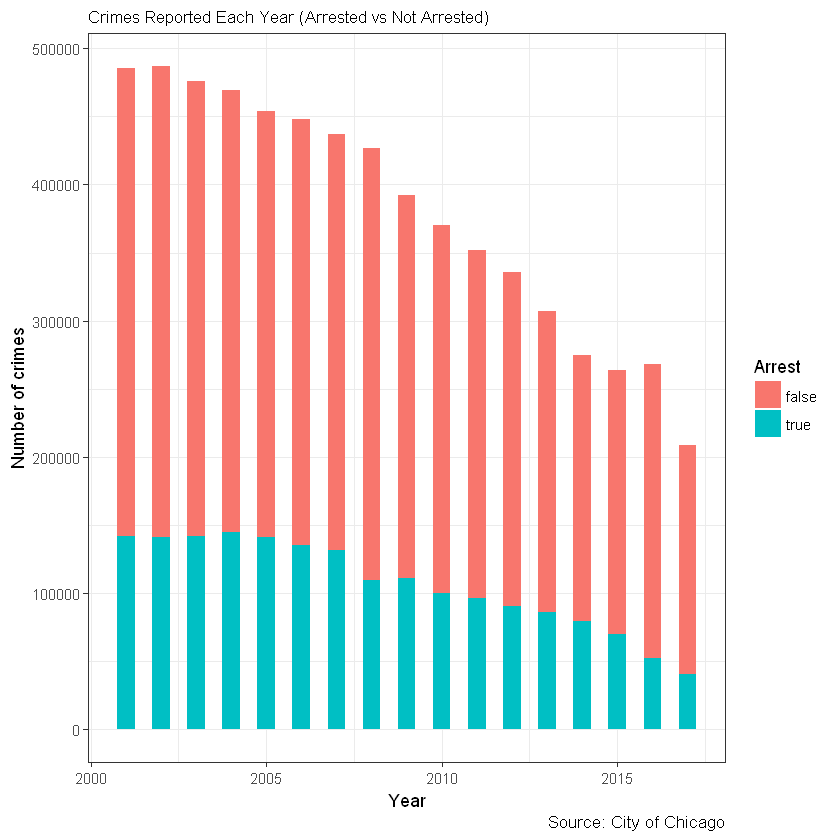

In [33]:
# Yearly crime rate arrested vs not arrested
yearCrimeRate <- DataDump %>% select(Year, Arrest) %>% 
  group_by(Year, Arrest) %>% count()
names(yearCrimeRate) <- c('Year','Arrest', 'Count')

ggplot(data = yearCrimeRate, mapping = aes(x = Year,y = Count, label = Count)) +
  geom_bar(stat="identity", aes(fill = Arrest), width=.5) +    
  labs(y = 'Number of crimes', 
       x = 'Year', 
       subtitle = 'Crimes Reported Each Year (Arrested vs Not Arrested)', caption = "Source: City of Chicago") 



Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths

The following objects are masked from 'package:data.table':

    dcast, melt


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Using Primary.Type as value column: use value.var to override.
Aggregation function missing: defaulting to length
Don't know how to automatically pick scale for object of type yearmon. Defaulting to continuous.


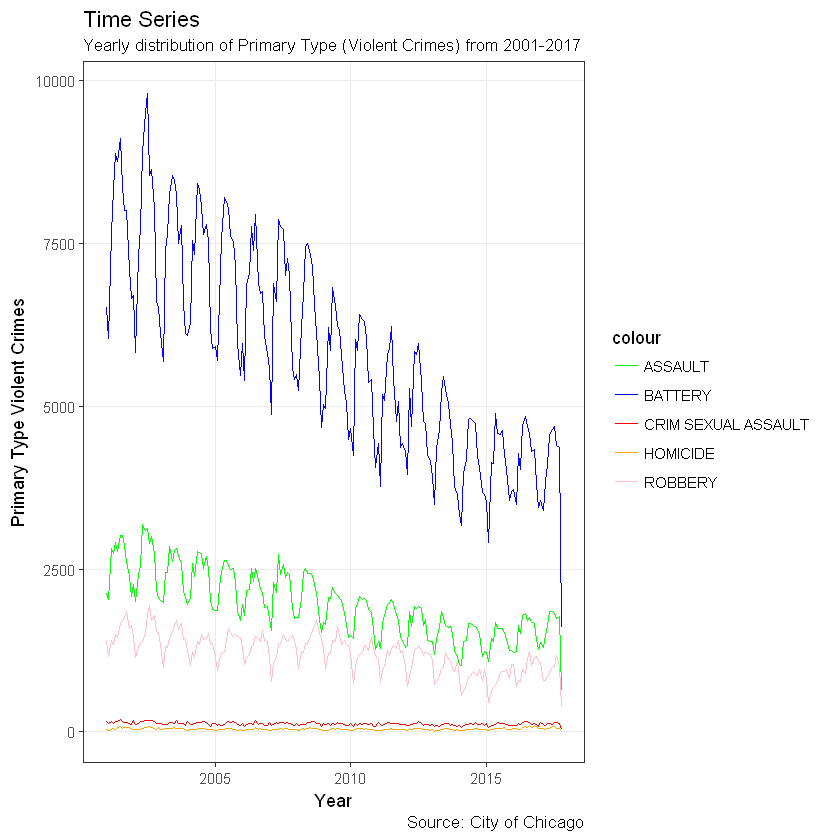

In [34]:
# Violent Crime rate fluctuations
library(reshape2)
library(zoo)
freqCrimeRateAllyears <- DataDump %>% filter(Primary.Type %in% ViolentCrime) %>%
  select(Year, Report_Month, Primary.Type)
freqCrimeRateAllyears <- freqCrimeRateAllyears %>% mutate(Date = as.yearmon(paste0(freqCrimeRateAllyears$Year, "-", freqCrimeRateAllyears$Report_Month)))
freqCrimeRateAllyears <- freqCrimeRateAllyears[,c('Date','Primary.Type')]
freqCrimeRateAllyearsTrans <- dcast(freqCrimeRateAllyears, Date ~ Primary.Type)

ggplot(freqCrimeRateAllyearsTrans, aes(x=Date)) + 
  geom_line(aes(y=ASSAULT, col="ASSAULT")) + 
  geom_line(aes(y=BATTERY, col="BATTERY")) + 
  geom_line(aes(y=`CRIM SEXUAL ASSAULT`, col="CRIM SEXUAL ASSAULT")) +
  geom_line(aes(y=HOMICIDE, col="HOMICIDE")) +
  geom_line(aes(y=ROBBERY, col="ROBBERY")) +
  scale_color_manual(values = c('green','blue','red','orange','pink')) + 
  theme(panel.grid.minor = element_blank()) +
  labs(x = "Year", y = "Primary Type Violent Crimes",
       subtitle="Yearly distribution of Primary Type (Violent Crimes) from 2001-2017", caption = "Source: City of Chicago",
       title= "Time Series")

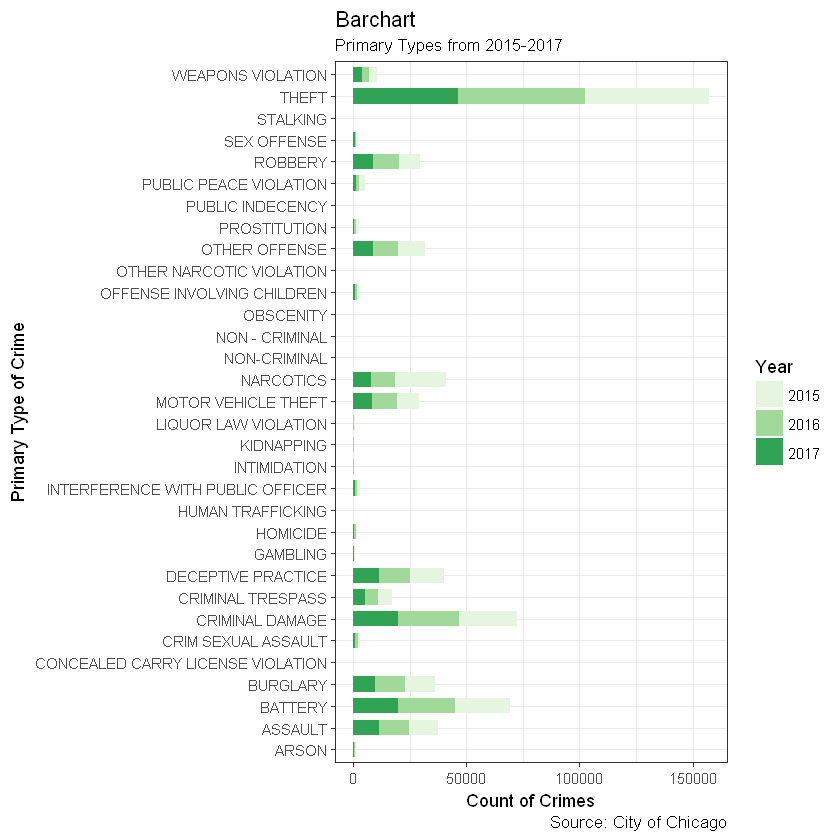

In [35]:
# Plot frequency of Primary types by year
freqPrimaryType <- crimedf %>%
  select(Primary.Type, Year) %>% group_by(Primary.Type, Year) %>% count()
freqPrimaryType <- freqPrimaryType[order(freqPrimaryType$n),]
freqPrimaryType$Year <- as.factor(freqPrimaryType$Year)

ggplot(freqPrimaryType, aes(x=Primary.Type, y=n)) +
  geom_bar(stat='identity', aes(fill=Year), width=.7)  +
  labs(y = 'Count of Crimes', x = 'Primary Type of Crime',
       subtitle="Primary Types from 2015-2017", caption = "Source: City of Chicago",
       title= "Barchart") + scale_fill_brewer(palette = "Greens") +
  coord_flip()

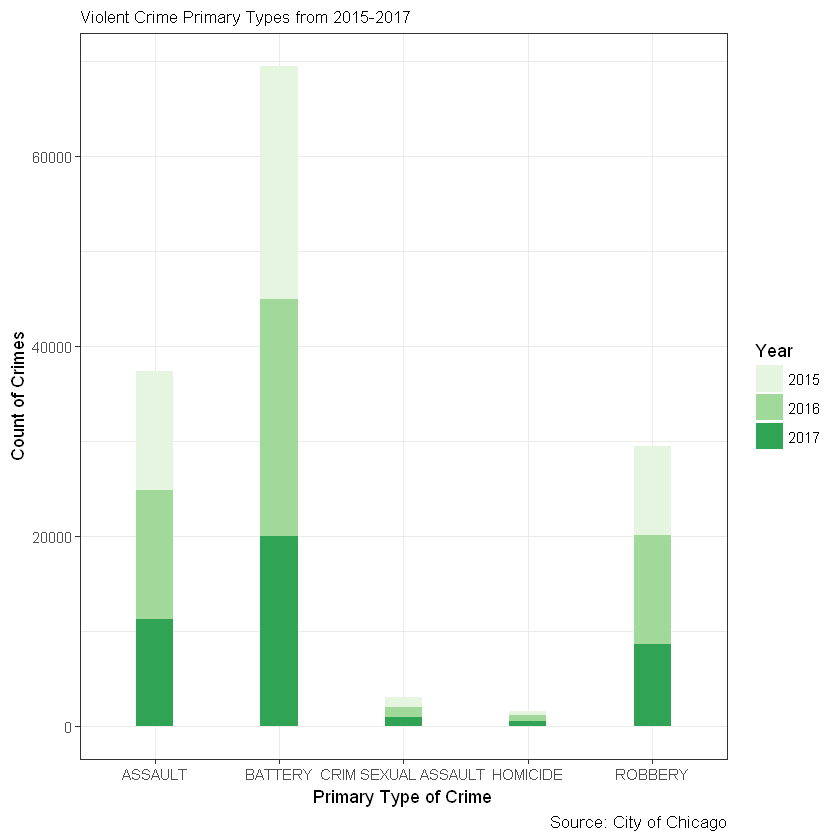

In [37]:
# Violent Crimes
freqPrimaryType <- crimedf %>% filter(Primary.Type %in% ViolentCrime) %>%
  select(Primary.Type, Year) %>% group_by(Primary.Type, Year) %>% count()
freqPrimaryType <- freqPrimaryType[order(freqPrimaryType$n),]
freqPrimaryType$Year <- as.factor(freqPrimaryType$Year)

ggplot(freqPrimaryType, aes(x=Primary.Type, y=n)) +
  geom_bar(stat='identity', aes(fill=Year), width=.3)  +
  labs(y = 'Count of Crimes', x = 'Primary Type of Crime',
       subtitle="Violent Crime Primary Types from 2015-2017", caption = "Source: City of Chicago") + 
  scale_fill_brewer(palette = "Greens")

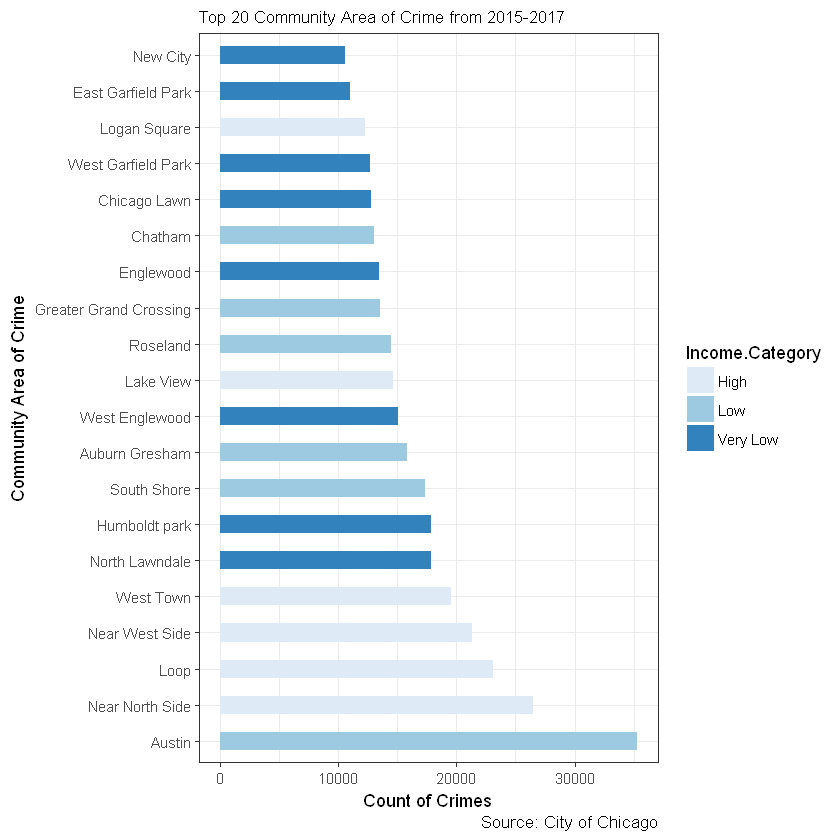

In [38]:
# Areas with high crime rates
freqCrimeAreas <- crimedf %>% 
  select(COMMUNITY.AREA.NAME, Income.Category) %>% group_by(COMMUNITY.AREA.NAME) %>% 
  count(Income.Category)
freqCrimeAreas <- freqCrimeAreas[order(freqCrimeAreas$n, decreasing = TRUE),]
freqCrimeAreas$COMMUNITY.AREA.NAME <- factor(freqCrimeAreas$COMMUNITY.AREA.NAME, levels = freqCrimeAreas$COMMUNITY.AREA.NAME)
freqCrimeAreasTop <- freqCrimeAreas[1:20,]

ggplot(freqCrimeAreasTop, aes(x=COMMUNITY.AREA.NAME, y=n)) + 
  geom_bar(stat='identity', aes(fill=Income.Category), width=.5)  +
  labs(y = 'Count of Crimes', x = 'Community Area of Crime',
       subtitle="Top 20 Community Area of Crime from 2015-2017", caption = "Source: City of Chicago") + 
  scale_fill_brewer(palette = "Blues") + 
  coord_flip()

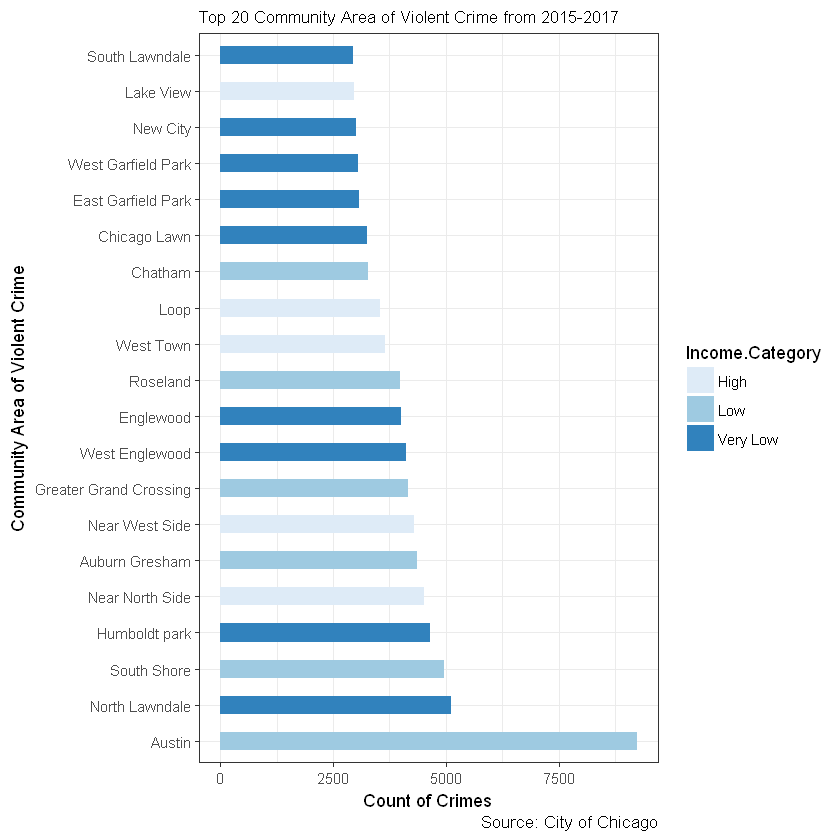

In [39]:
# Areas with high crime violent rates
freqCrimeAreas <- crimedf %>% filter(Primary.Type %in% ViolentCrime) %>%
  select(COMMUNITY.AREA.NAME, Income.Category) %>% group_by(COMMUNITY.AREA.NAME) %>% 
  count(Income.Category)
freqCrimeAreas <- freqCrimeAreas[order(freqCrimeAreas$n, decreasing = TRUE),]
freqCrimeAreas$COMMUNITY.AREA.NAME <- factor(freqCrimeAreas$COMMUNITY.AREA.NAME, levels = freqCrimeAreas$COMMUNITY.AREA.NAME)
freqCrimeAreasTop <- freqCrimeAreas[1:20,]

ggplot(freqCrimeAreasTop, aes(x=COMMUNITY.AREA.NAME, y=n)) + 
  geom_bar(stat='identity', aes(fill=Income.Category), width=.5)  +
  labs(y = 'Count of Crimes', x = 'Community Area of Violent Crime',
       subtitle="Top 20 Community Area of Violent Crime from 2015-2017", caption = "Source: City of Chicago") + 
  scale_fill_brewer(palette = "Blues") + 
  coord_flip()

Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=Chicago&sensor=false
Map from URL : http://maps.googleapis.com/maps/api/staticmap?center=chicago&zoom=12&size=640x640&scale=2&maptype=roadmap&language=en-EN&sensor=false
Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=chicago&sensor=false


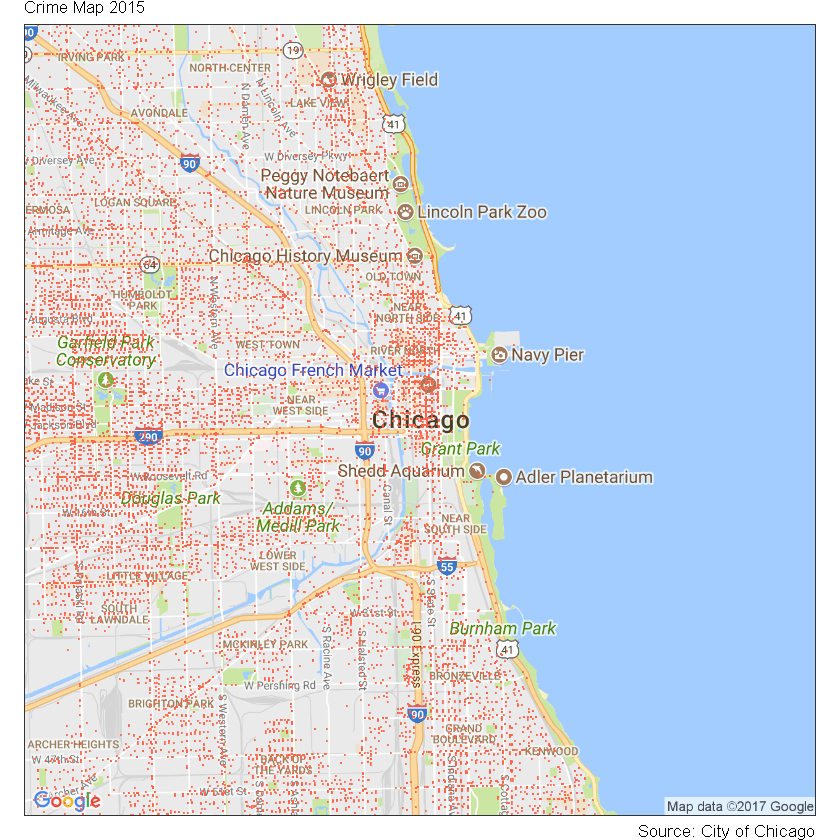

In [40]:
# Map
library(ggmap)
library(ggalt)
chicago <- geocode("Chicago")
chicago_ggl_road_map <- qmap("chicago", zoom=12, source = "google", maptype="roadmap")  
chicago_ggl_road_map +
  geom_point(aes(x=Longitude, y=Latitude),
             data = crimedf[(crimedf$Primary.Type %in% ViolentCrime) & crimedf$Year==2015,], 
             alpha = 0.7, 
             size = 0.3, 
             color = "tomato") +
  labs(x = "Longitue", y = "Latitude",
       subtitle="Crime Map 2015", caption = "Source: City of Chicago")

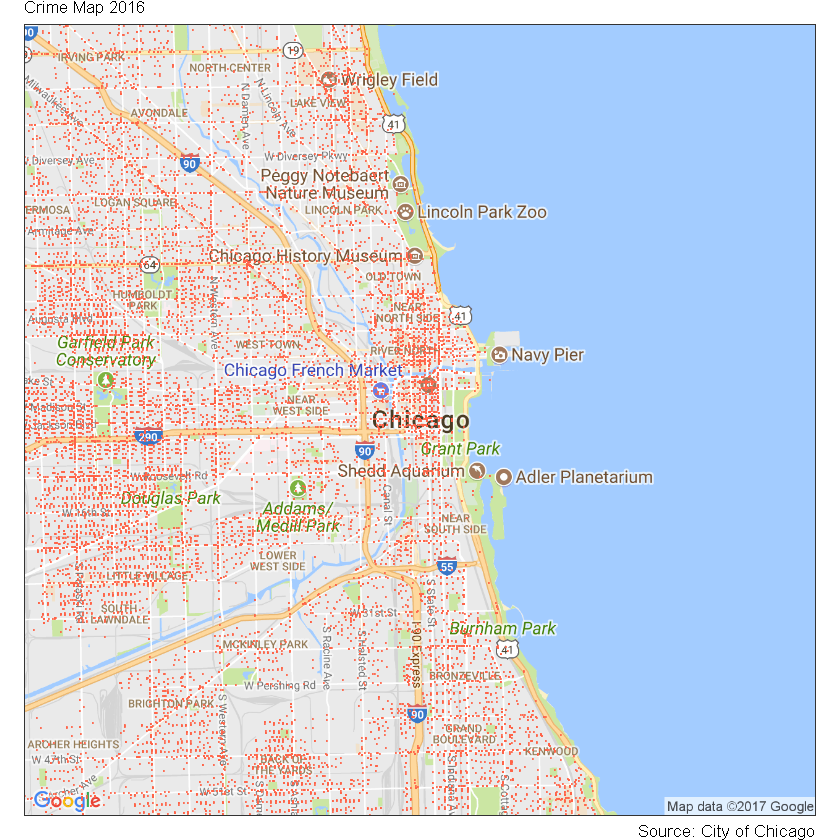

In [41]:
chicago_ggl_road_map +
  geom_point(aes(x=Longitude, y=Latitude),
             data = crimedf[(crimedf$Primary.Type %in% ViolentCrime) & crimedf$Year==2016,], 
             alpha = 0.7, 
             size = 0.3, 
             color = "tomato") +
  labs(x = "Longitue", y = "Latitude",
       subtitle="Crime Map 2016", caption = "Source: City of Chicago")

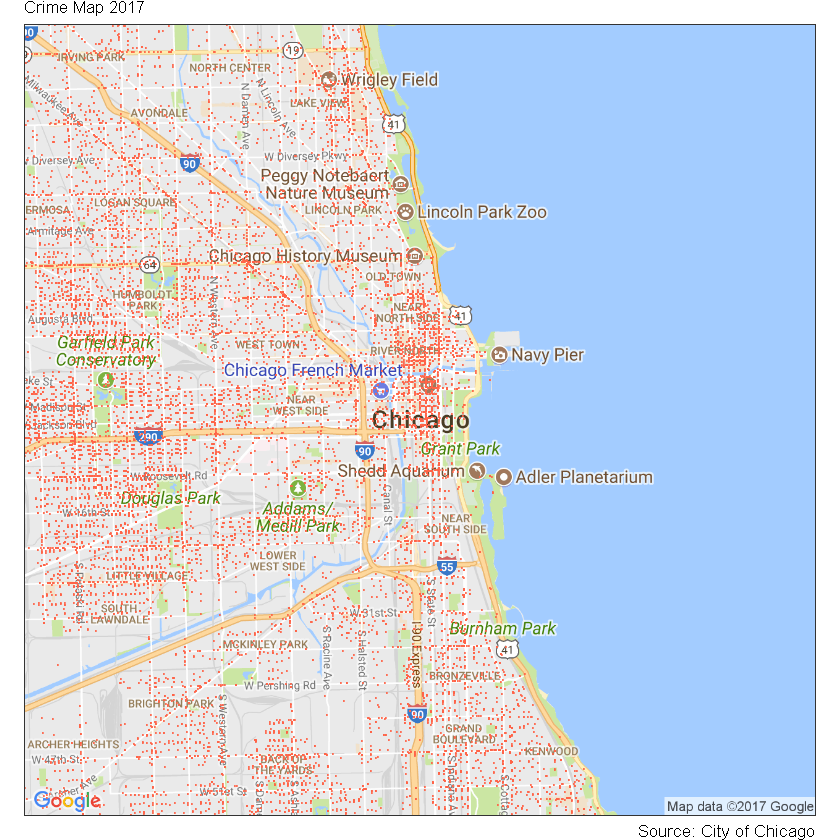

In [42]:
chicago_ggl_road_map +
  geom_point(aes(x=Longitude, y=Latitude),
             data = crimedf[(crimedf$Primary.Type %in% ViolentCrime) & crimedf$Year==2017,], 
             alpha = 0.7, 
             size = 0.3, 
             color = "tomato") +
  labs(x = "Longitue", y = "Latitude",
       subtitle="Crime Map 2017", caption = "Source: City of Chicago")

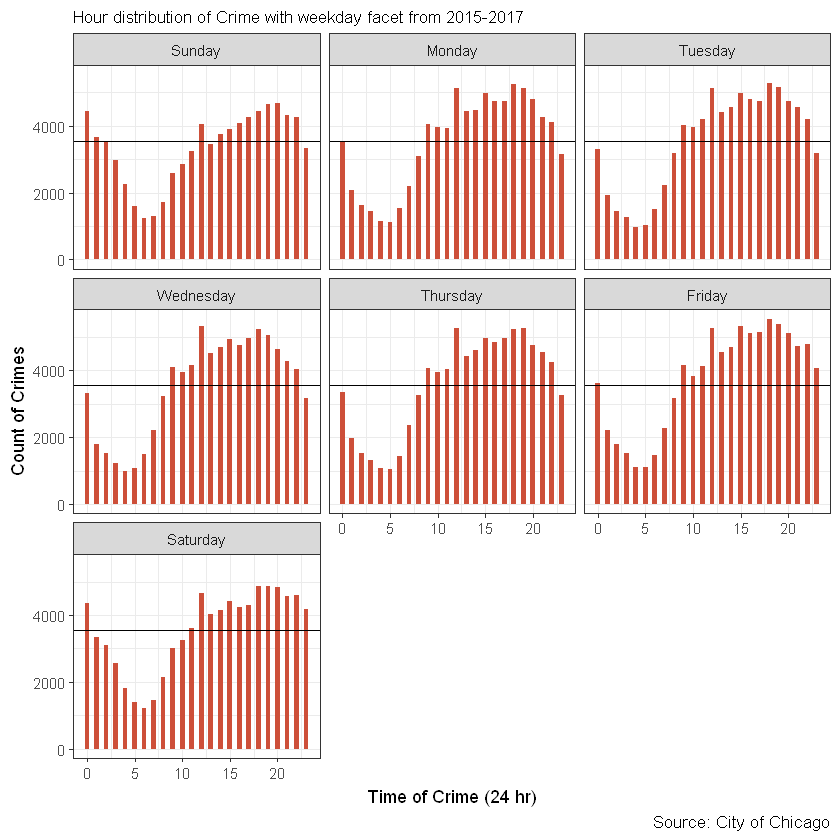

In [43]:
# Crime rate in time
freqCrimeTime <- crimedf %>% select(Report_Hour, Report_Wday) 
freqCrimeTime$Report_Wday <- as.factor(freqCrimeTime$Report_Wday) 
meanWeeklycrime <- nrow(freqCrimeTime)/(24*7)

levels(freqCrimeTime$Report_Wday) <- c("Sunday", "Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
ggplot(freqCrimeTime, aes(Report_Hour)) + 
  geom_histogram(binwidth = .5, 
                 fill="tomato3", 
                 size=.1) + geom_hline(yintercept = meanWeeklycrime) +
  facet_wrap(~ Report_Wday) + 
  labs(y = 'Count of Crimes', x = 'Time of Crime (24 hr)',
       subtitle="Hour distribution of Crime with weekday facet from 2015-2017", 
       caption = "Source: City of Chicago")

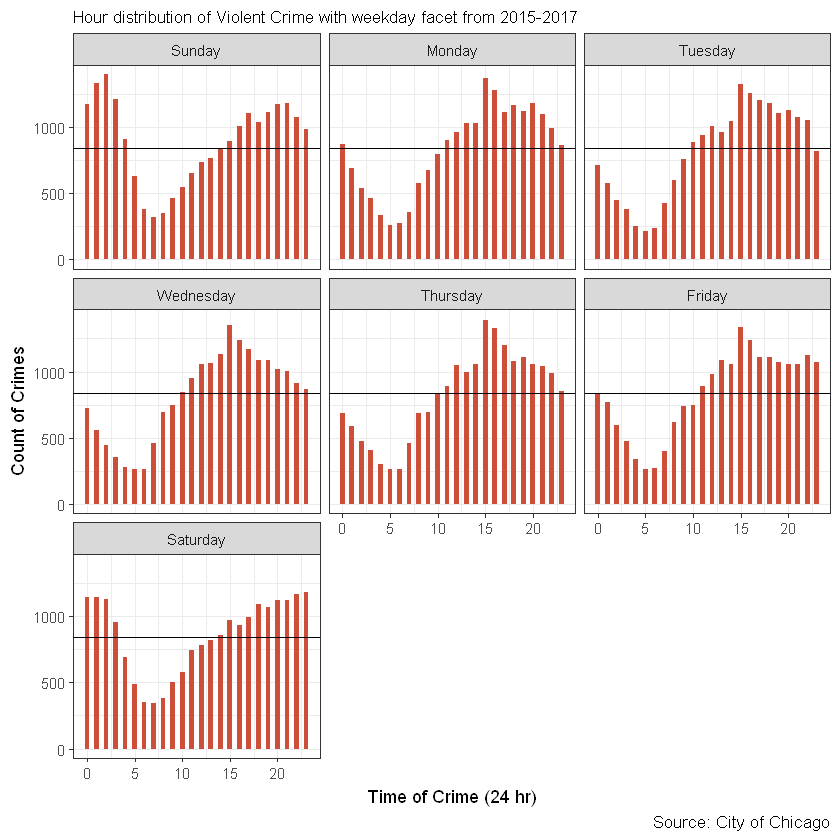

In [44]:
# Violent Crime rate in time
freqCrimeTime <- crimedf %>% filter(Primary.Type %in% ViolentCrime) %>%
  select(Report_Hour, Report_Wday) 
freqCrimeTime$Report_Wday <- as.factor(freqCrimeTime$Report_Wday) 
meanWeeklycrime <- nrow(freqCrimeTime)/(24*7)

levels(freqCrimeTime$Report_Wday) <- c("Sunday", "Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")
ggplot(freqCrimeTime, aes(Report_Hour)) + 
  geom_histogram(binwidth = .5, 
                 fill="tomato3", 
                 size=.1) + geom_hline(yintercept = meanWeeklycrime) +
  facet_wrap(~ Report_Wday) + 
  labs(y = 'Count of Crimes', x = 'Time of Crime (24 hr)',
       subtitle="Hour distribution of Violent Crime with weekday facet from 2015-2017", 
       caption = "Source: City of Chicago")

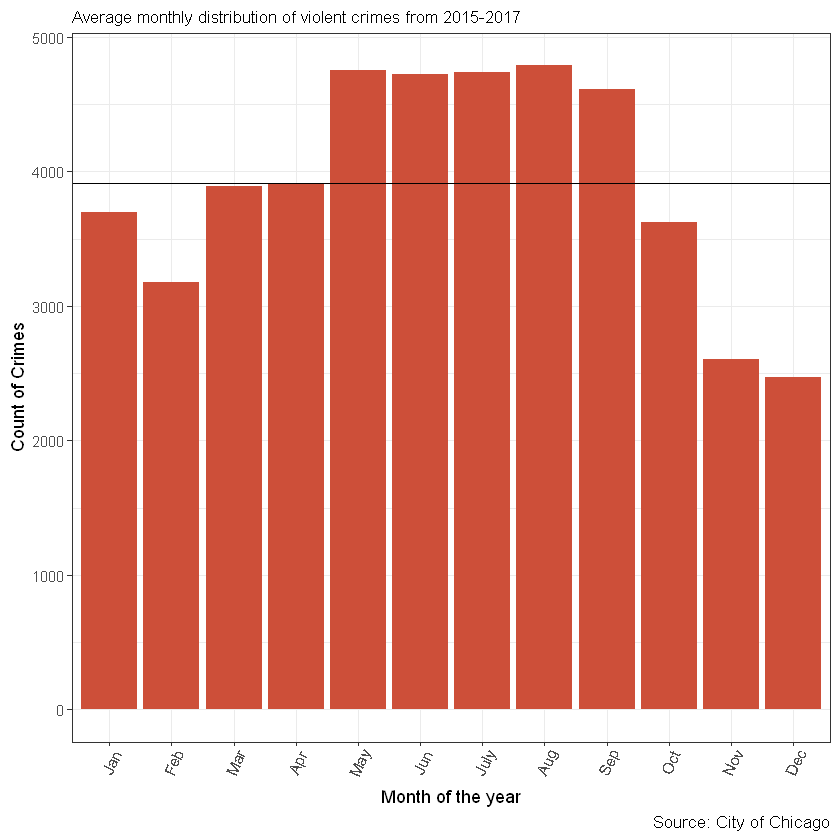

In [45]:
# Month
freqCrimeMonthDay <- crimedf %>% filter(Primary.Type %in% ViolentCrime) %>% count(Report_Month) 
freqCrimeMonthDay$n <- freqCrimeMonthDay$n/3
freqCrimeMonthDay$Report_Month <- as.factor(freqCrimeMonthDay$Report_Month)
levels(freqCrimeMonthDay$Report_Month) <- c("Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec")
meanMonthlycrime <- sum(freqCrimeMonthDay$n)/12

ggplot(freqCrimeMonthDay, aes(x=Report_Month, y=n)) + 
  geom_bar(stat="identity", 
           fill="tomato3", 
           size=.1) +
  theme(axis.text.x = element_text(angle=65, vjust=0.6)) + geom_hline(yintercept = meanMonthlycrime) +
  labs(y = 'Count of Crimes', x = 'Month of the year',
       subtitle="Average monthly distribution of violent crimes from 2015-2017", caption = "Source: City of Chicago")


In [46]:
# # Weather
# # Violent Crimes
# freqPrimaryTypeWeather <- crimedf %>% filter(Primary.Type %in% ViolentCrime) %>%
#   select(Primary.Type, WeatherEvent) %>% group_by(Primary.Type, WeatherEvent) %>% count()
# freqPrimaryTypeWeather$WeatherEvent <- as.factor(freqPrimaryTypeWeather$WeatherEvent)
# 
# ggplot(freqPrimaryTypeWeather, aes(x=Primary.Type, y=n)) +
#   geom_bar(stat='identity', aes(fill=WeatherEvent), width=.5)  +
#   labs(y = 'Count of Crimes', x = 'Primary Type of Crime',
#        subtitle="Violent Crime Primary Types from 2015-2017", caption = "Source: City of Chicago") + 
#   scale_fill_brewer(palette = "Blues") +
#   coord_flip() 

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: 'plyr'

The following object is masked from 'package:lubridate':

    here

The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize



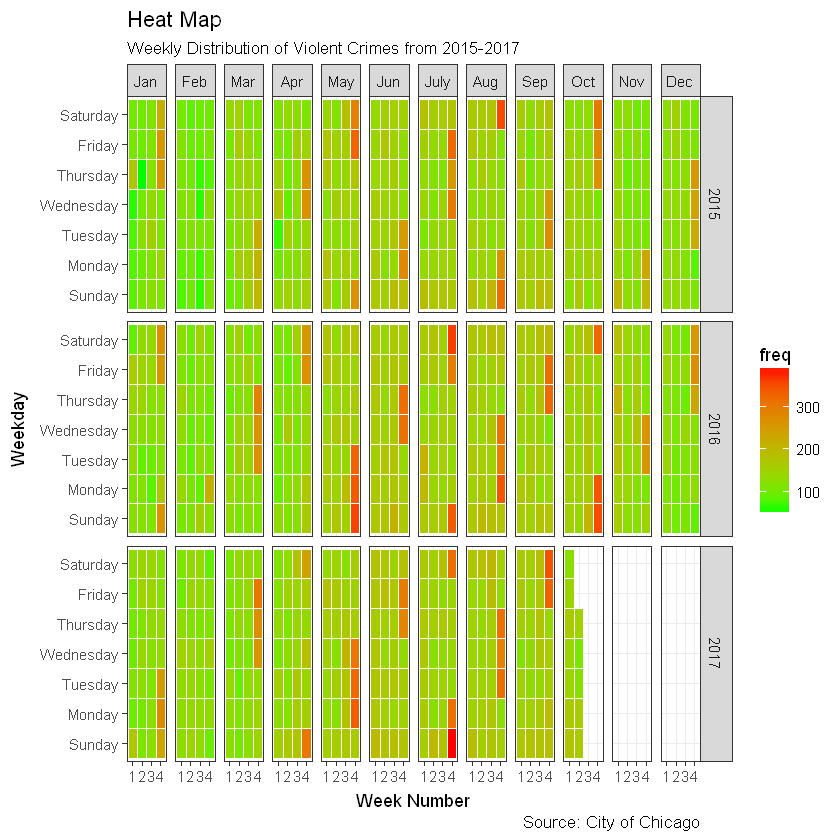

In [47]:
# Heat map
library(plyr)
library(scales)
freqCrimeYearMonthWeek <- crimedf %>% filter(Primary.Type %in% ViolentCrime) %>%
  select(Year, Report_Month, Report_Day, Report_Wday) 
freqCrimeYearMonthWeek$Report_Day <- as.integer(freqCrimeYearMonthWeek$Report_Day)
freqCrimeYearMonthWeek$Week <- cut(freqCrimeYearMonthWeek$Report_Day, breaks = c(0, 7, 14, 21 ,Inf), labels = c(1,2,3,4))

freqCrimeYearMonthWeek1 <- freqCrimeYearMonthWeek %>% select(Year, Report_Month, Week, Report_Wday) %>%
  group_by(Year, Report_Month, Week, Report_Wday) %>% count()

freqCrimeYearMonthWeek1$Report_Month <- as.factor(freqCrimeYearMonthWeek1$Report_Month)
levels(freqCrimeYearMonthWeek1$Report_Month) <- c("Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec")
freqCrimeYearMonthWeek1$Year <- as.factor(freqCrimeYearMonthWeek1$Year)
freqCrimeYearMonthWeek1$Week <- as.factor(freqCrimeYearMonthWeek1$Week)
freqCrimeYearMonthWeek1$Report_Wday <- as.factor(freqCrimeYearMonthWeek1$Report_Wday)
levels(freqCrimeYearMonthWeek1$Report_Wday) <- c("Sunday", "Monday","Tuesday", "Wednesday", "Thursday", "Friday", "Saturday")

ggplot(freqCrimeYearMonthWeek1, aes(Week, Report_Wday, fill = freq)) + 
  geom_tile(colour = "white") + 
  facet_grid(Year ~ Report_Month) + 
  scale_fill_gradient(low="green", high="red") +
  labs(x = "Week Number", y = "Weekday",
       subtitle="Weekly Distribution of Violent Crimes from 2015-2017", caption = "Source: City of Chicago",
       title= "Heat Map")

Selecting by freq


Primary.Type,Description,freq
ROBBERY,ARMED: HANDGUN,11582
ROBBERY,STRONGARM - NO WEAPON,9252
ROBBERY,AGGRAVATED,1723
ROBBERY,ARMED: OTHER DANGEROUS WEAPON,1275
ROBBERY,ARMED:KNIFE/CUTTING INSTRUMENT,1264
HOMICIDE,FIRST DEGREE MURDER,1583
HOMICIDE,RECKLESS HOMICIDE,10
CRIM SEXUAL ASSAULT,NON-AGGRAVATED,2088
CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,390
CRIM SEXUAL ASSAULT,PREDATORY,162


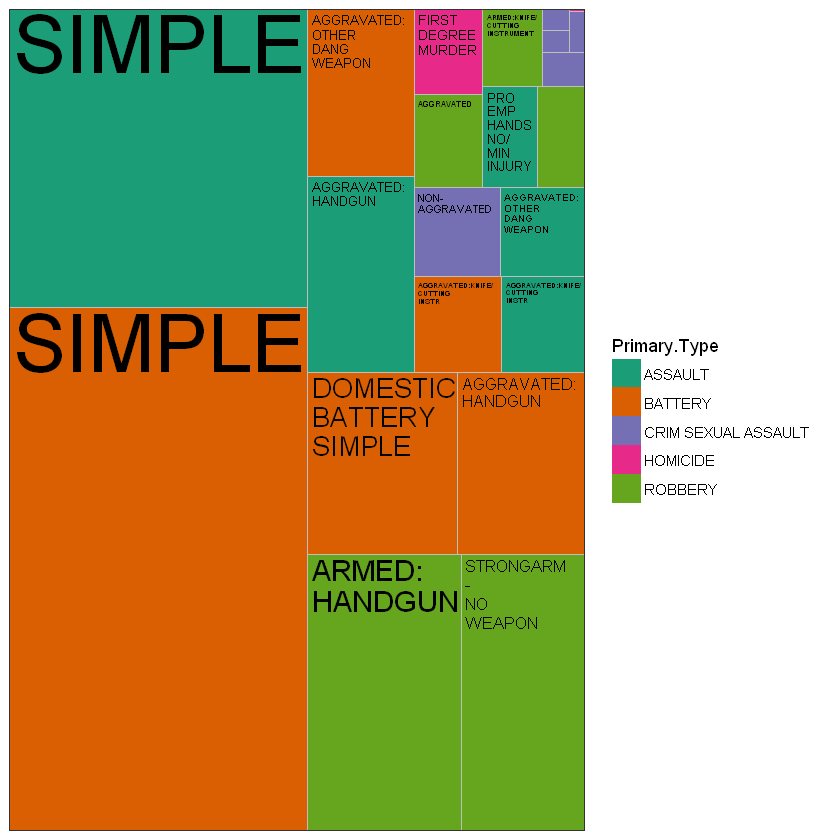

In [48]:
# Treemap
library(treemapify)
freqTreemap <- crimedf %>% filter(Primary.Type %in% ViolentCrime) %>%
  select(Primary.Type, Description) %>% filter(Primary.Type %in% ViolentCrime) %>%
  group_by(Primary.Type, Description) %>% count()
freqTreemap <- freqTreemap[order(freqTreemap$Primary.Type,freqTreemap$freq, decreasing = TRUE),]
freqTreemap <- freqTreemap %>% group_by(Primary.Type) %>% top_n(5)
freqTreemap

ggplot(freqTreemap, aes(area = freq, fill = Primary.Type, 
                        label = Description, group = Primary.Type)) +
  geom_treemap() + geom_treemap_text(grow = T, reflow = T, colour = "black") +
  scale_fill_brewer(palette = "Dark2")

In [50]:
# Check statistical significance
# Domestic vs income
#chisq.test(crimedf$Income.Category, crimedf$Domestic)

# Weather vs Violent crime
chisq.test(crimedf$WeatherEvent, as.factor(crimedf$Index.Crime))


	Pearson's Chi-squared test

data:  crimedf$WeatherEvent and as.factor(crimedf$Index.Crime)
X-squared = 198.59, df = 12, p-value < 0.00000000000000022


### Transforming Data Prior to Modelling

In [52]:
# Remove unwanted predictor columns which are obvious.
# Block has 60000 levels. It will not help the model in fact cause problems
# Location description is not important as we have other pointers.
crimedf[crimedf$Location.Description=='','Location.Description'] <- 'NOT RECORDED'
excludeList <- c('Year', 'IUCR', 'Arrest', 'Domestic', 'FBI.Code', 'Latitude', 'Primary.Type',
                 'Longitude', 'COMMUNITY.AREA.NAME', 'Description', 'Block', 'Location.Description')
includeList <- names(crimedf[!names(crimedf) %in% c(excludeList)])
includeList
df <- crimedf[,includeList]

[1] "Report_Month"    "Report_Day"      "Community.Area"  "Beat"           
 [5] "District"        "Ward"            "X.Coordinate"    "Y.Coordinate"   
 [9] "Report_Hour"     "Report_Wday"     "Income.Category" "WeatherEvent"   
[13] "Index.Crime"

In [53]:
# Preprocess data prior to fit
df <- df %>% mutate(WeatherEvents = gsub(" , ", "_" ,WeatherEvent)) %>% select(-WeatherEvent)
df$WeatherEvents <- as.factor(df$WeatherEvents) 

'data.frame':	595993 obs. of  28 variables:
 $ Report_Month            : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Report_Day              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Community.Area          : num  0.0526 0.4211 0.6579 0.2368 0.5526 ...
 $ Beat                    : num  0.7467 0.00825 0.13201 0.99175 0.12789 ...
 $ District                : num  0.6 0 0.1 0.8 0.1 ...
 $ Ward                    : num  0.6327 0.0204 0.1837 0.7347 0.1224 ...
 $ X.Coordinate            : num  0.591 0.746 0.949 0.422 0.911 ...
 $ Y.Coordinate            : num  0.787 0.588 0.208 0.725 0.293 ...
 $ Report_Hour             : num  0.174 0.87 0.391 0.348 0 ...
 $ Report_Wday             : num  0.667 0.667 0.667 0.667 0.667 ...
 $ Index.Crime             : num  0 0 0 0 0 0 0 0 1 0 ...
 $ dfFog                   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ dfFog_Rain              : num  0 0 0 0 0 0 0 0 0 0 ...
 $ dfFog_Rain_Snow         : num  0 0 0 0 0 0 0 0 0 0 ...
 $ dfFog_Rain_Thunderstorm : num  0 0 0 0 0 0 0 0 0 0 ...
 $ d

In [54]:
# One hot encoding
library("dummies")
df <- cbind(df, dummy(df$WeatherEvents))
df <- df %>% select(-WeatherEvents)

df <- cbind(df, dummy(df$Income.Category))
df <- df %>% select(-Income.Category)

dummies-1.5.6 provided by Decision Patterns



In [55]:
# Scale values: min max scaler
scaleIt <- function(x){
  return ((x - min(x)) / (max(x) - min(x)))}
for(i in seq_len(ncol(df))) {df[,i] <- scaleIt(df[,i])}

### Stratefied Sampling

In [56]:
# Variables
yVar <- 'Index.Crime'
xVars <- names(df)[!names(df) %in% yVar]

# stratefied sampling of data for test train
library(caret)
set.seed(seedVal)
trainPct <- .8
testPct <- 1 - trainPct
inTrain <- createDataPartition(y = df[,c(yVar)], p = trainPct, list = FALSE)
traindata <- df[inTrain, ]
testdata <- df[-inTrain, ]
stopifnot(nrow(traindata) + nrow(testdata) == nrow(df))

Loading required package: lattice


### Feature Selection using Lasso

In [57]:
# Boosted lasso logistic model
library(SparseLearner)
#model_Bolasso <- Bolasso(x = traindata[,xVars], y = as.factor(traindata[,yVar]), BM = 10, kfold = 10, seed = seedVal)
summary(model_Bolasso)
model_Bolasso$var.selected
selxVars <- model_Bolasso$var.selected

Loading required package: glmnet
Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Loading required package: foreach
Loaded glmnet 2.0-10



             Length Class  Mode     
var.selected 11     -none- character

[1] "District"            "Ward"                "X.Coordinate"       
 [4] "Report_Hour"         "Report_Wday"         "dfRain_Thunderstorm"
 [7] "dfSnow"              "dfThunderstorm"      "dfHigh"             
[10] "dfMedium"            "dfVery Low"

In [74]:
# Create model formula function
createModelFormula <- function(targetVar, xVars, includeIntercept = TRUE){
  if(includeIntercept){
    modelForm <- as.formula(paste(targetVar, "~", paste(xVars, collapse = '+ ')))
  } else {
    modelForm <- as.formula(paste(targetVar, "~", paste(xVars, collapse = '+ '), -1))
  }
  return(modelForm)
}

In [78]:
# Some issues with spaces in between column names
selxVars <- make.names(selxVars)
xVars <- make.names(xVars)
names(traindata) <- make.names(names(traindata))
names(testdata) <- make.names(names(testdata))

### Logistic Regression

In [79]:
simpleModelForm <- createModelFormula(yVar, xVars)
simpleModelForm

Index.Crime ~ Report_Month + Report_Day + Community.Area + Beat + 
    District + Ward + X.Coordinate + Y.Coordinate + Report_Hour + 
    Report_Wday + dfFog + dfFog_Rain + dfFog_Rain_Snow + dfFog_Rain_Thunderstorm + 
    dfFog_Snow + dfFog_Snow_Thunderstorm + dfNoEvent + dfRain + 
    dfRain_Hail_Thunderstorm + dfRain_Snow + dfRain_Thunderstorm + 
    dfSnow + dfThunderstorm + dfHigh + dfMedium + dfLow + dfVery.Low
<environment: 0x000000003a2807f8>

In [80]:
# Fit glm
library(caTools)
model_glm_simple <- glm(simpleModelForm,family=binomial(link='logit'),data=traindata)
summary(model_glm_simple)


Call:
glm(formula = simpleModelForm, family = binomial(link = "logit"), 
    data = traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0702  -0.7801  -0.6877  -0.5865   2.1702  

Coefficients: (2 not defined because of singularities)
                          Estimate Std. Error z value             Pr(>|z|)    
(Intercept)              -1.002029   0.059373 -16.877 < 0.0000000000000002 ***
Report_Month              0.032432   0.012179   2.663             0.007749 ** 
Report_Day                0.005533   0.011797   0.469             0.639061    
Community.Area            0.056535   0.021693   2.606             0.009156 ** 
Beat                     -2.477994   0.662720  -3.739             0.000185 ***
District                  3.227227   0.823515   3.919   0.0000889739743361 ***
Ward                     -0.204662   0.018262 -11.207 < 0.0000000000000002 ***
X.Coordinate              0.479947   0.035817  13.400 < 0.0000000000000002 ***
Y.Coordinate           

In [81]:
# Predict on test Data
predictglm <- predict(model_glm_simple, newdata = testdata[,xVars], type = "response")
predictglmtest <- ifelse(predictglm > 0.5,1,0)
# Measure performance
confusionsimpleGlm <- confusionMatrix(predictglmtest, testdata$Index.Crime)
confusionsimpleGlm

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 91093 28102
         1     3     0
                                             
               Accuracy : 0.7642             
                 95% CI : (0.7618, 0.7666)   
    No Information Rate : 0.7642             
    P-Value [Acc > NIR] : 0.5098             
                                             
                  Kappa : -0.0001            
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 1.0000             
            Specificity : 0.0000             
         Pos Pred Value : 0.7642             
         Neg Pred Value : 0.0000             
             Prevalence : 0.7642             
         Detection Rate : 0.7642             
   Detection Prevalence : 1.0000             
      Balanced Accuracy : 0.5000             
                                             
       'Positive' Class : 0                  
    

### Logistic Regression with Lasso

In [66]:
# Create formula
modelForm <- createModelFormula(yVar, selxVars)
modelForm

Index.Crime ~ District + Ward + X.Coordinate + Report_Hour + 
    Report_Wday + dfRain_Thunderstorm + dfSnow + dfThunderstorm + 
    dfHigh + dfMedium + dfVery.Low
<environment: 0x000000011a8ac150>

In [67]:
# Fit glm with Lasso
model_glm <- glm(modelForm,family=binomial(link='logit'),data=traindata)
summary(model_glm)
anova(model_glm, test="Chisq")


Call:
glm(formula = modelForm, family = binomial(link = "logit"), data = traindata)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.9488  -0.7806  -0.6873  -0.5877   2.0657  

Coefficients:
                     Estimate Std. Error z value             Pr(>|z|)    
(Intercept)         -1.110428   0.027132 -40.927 < 0.0000000000000002 ***
District             0.165261   0.022730   7.271    0.000000000000358 ***
Ward                -0.179642   0.017365 -10.345 < 0.0000000000000002 ***
X.Coordinate         0.383178   0.030747  12.462 < 0.0000000000000002 ***
Report_Hour         -0.201983   0.012072 -16.731 < 0.0000000000000002 ***
Report_Wday         -0.094497   0.010352  -9.128 < 0.0000000000000002 ***
dfRain_Thunderstorm  0.044447   0.010961   4.055    0.000050147782244 ***
dfSnow              -0.137088   0.014244  -9.624 < 0.0000000000000002 ***
dfThunderstorm       0.175484   0.038170   4.597    0.000004277047697 ***
dfHigh              -0.430803   0.009770 -44.0

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,476794,521875.7,NA
District,1,589.80489,476793,521285.9,0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000002762792422318343933153317
Ward,1,670.27589,476792,520615.6,0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000008701778
X.Coordinate,1,10.09780,476791,520605.5,0.0014844611132187079168692767083825856389012187719345092773437500000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
Report_Hour,1,250.15584,476790,520355.3,0.0000000000000000000000000000000000000000000000000000000240140138659261364933658611242606184532633051276206970214843750000000000000000000000000000000000000
Report_Wday,1,97.38236,476789,520257.9,0.0000000000000000000000571528894936674025737538551439342882076743990182876586914062500000000000000000000000000000000000000000000000000000000000000000000000
dfRain_Thunderstorm,1,20.26698,476788,520237.7,0.0000067353132816996914809803964629963957122527062892913818359375000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000
dfSnow,1,94.21433,476787,520143.5,0.0000000000000000000002831427423002727268575018371166152064688503742218017578125000000000000000000000000000000000000000000000000000000000000000000000000000
dfThunderstorm,1,19.14481,476786,520124.3,0.0000121166778203808717291351665368281942392059136182069778442382812500000000000000000000000000000000000000000000000000000000000000000000000000000000000000
dfHigh,1,2407.49212,476785,517716.8,0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


In [69]:
# Predict on test Data
predictglm <- predict(model_glm, newdata = testdata[,selxVars], type = "response")
predictglmtest <- ifelse(predictglm > 0.5,1,0)
# Measure performance
confusionglm <- confusionMatrix(predictglmtest, testdata$Index.Crime)
confusionglm

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 91096 28102
         1     0     0
                                             
               Accuracy : 0.7642             
                 95% CI : (0.7618, 0.7666)   
    No Information Rate : 0.7642             
    P-Value [Acc > NIR] : 0.5016             
                                             
                  Kappa : 0                  
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 1.0000             
            Specificity : 0.0000             
         Pos Pred Value : 0.7642             
         Neg Pred Value :    NaN             
             Prevalence : 0.7642             
         Detection Rate : 0.7642             
   Detection Prevalence : 1.0000             
      Balanced Accuracy : 0.5000             
                                             
       'Positive' Class : 0                  
    

### XGBoost

In [58]:
# XGBoost without feature selection
library("xgboost")
mtrain <- model.matrix(~.+0,data = traindata[,xVars]) 
mtest <- model.matrix(~.+0,data = testdata[,xVars])

dtrain <- xgb.DMatrix(data = mtrain,label = traindata[,yVar])
dtest <- xgb.DMatrix(data = mtest,label=testdata[,yVar])


Attaching package: 'xgboost'

The following object is masked from 'package:dplyr':

    slice



### Grid Tuning of XGB.
#### Caution: Takes huge time to tune

In [ ]:
# ######################## Grid Tune #########################
# 
# library(mlr)
# 
# # Since we have best rounds using default params, we can use grid tune to improve performance
# # convert characters to factors
# traindata$Index.Crime <- as.factor(traindata$Index.Crime)
# testdata$Index.Crime <- as.factor(testdata$Index.Crime)
# 
# colnames(traindata)[28] <- "dfVeryLow"
# colnames(testdata)[28] <- "dfVeryLow"
# 
# # create tasks
# traintask <- makeClassifTask(data = traindata, target = "Index.Crime")
# testtask <- makeClassifTask(data = testdata, target = "Index.Crime")
# 
# # One hot encoding
# traintask <- createDummyFeatures (obj = traintask)
# testtask <- createDummyFeatures (obj = testtask)
# 
# #create learner
# lrn <- makeLearner("classif.xgboost", predict.type = "response")
# lrn$par.vals <- list( objective="binary:logistic", eval_metric="error", nrounds=100L, eta=0.2)
# 
# params <- makeParamSet( makeDiscreteParam("booster", values = c("gbtree","gblinear")),
#                         makeIntegerParam("max_depth",lower = 5L, upper = 15L),
#                         makeNumericParam("min_child_weight",lower = 1L, upper = 10L),
#                         makeNumericParam("subsample", lower = 0.5, upper = 1),
#                         makeNumericParam("colsample_bytree", lower = 0.5, upper = 1))
# 
# 
# #set resampling strategy
# rdesc <- makeResampleDesc("CV",stratify = T,iters=5L)
# 
# #search strategy
# ctrl <- makeTuneControlRandom()
# 
# #parameter tuning
# tuned <- tuneParams(learner = lrn, task = traintask,
#                     resampling = rdesc, measures = acc,
#                     par.set = params, control = ctrl, show.info = T)
# print(tuned)
# 
# save.image('CCP_XGBGridTune.RData')
# 
# ######################## Grid Tune End #########################

#Tune result:
#Op. pars: booster=gbtree; max_depth=10; min_child_weight=6.27; subsample=0.913; colsample_bytree=0.618


In [59]:
# Re run using tuned results
params <- list(booster = "gbtree", objective = "binary:logistic", 
               eta=0.2, gamma=0, max_depth = 10, min_child_weight = 6.27,
               seed = seedVal, nthread = 4, 
               subsample = 0.913, colsample_bytree = 0.618)

# Calculate the best round
xgbcv <- xgb.cv( params = params, data = dtrain, nrounds = 100, nfold = 5,
                 showsd = T, stratified = T, print_every_n = 10,
                 early_stopping_rounds = 20, maximize = F)

# Train model with the best round
xgbmodel <- xgb.train (params = params, data = dtrain, nrounds = xgbcv$best_iteration, 
                       watchlist = list(val=dtest,train=dtrain), 
                       print_every_n = 10, early_stopping_rounds = 10, 
                       maximize = F , eval_metric = "error")

In [60]:
summary(xgbmodel)

                Length Class              Mode       
handle               1 xgb.Booster.handle externalptr
raw             454839 -none-             raw        
best_iteration       1 -none-             numeric    
best_ntreelimit      1 -none-             numeric    
best_score           1 -none-             numeric    
niter                1 -none-             numeric    
evaluation_log       3 data.table         list       
call                 9 -none-             call       
params              12 -none-             list       
callbacks            3 -none-             list       

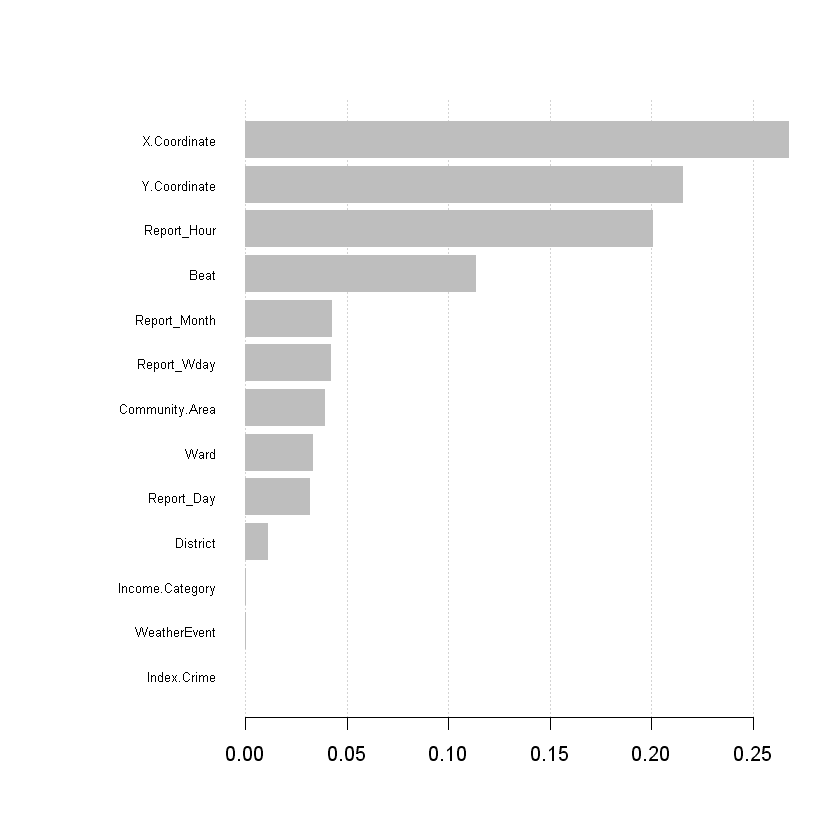

In [61]:
# Compute feature importance matrix
impFeatures <- xgb.importance(includeList, model = xgbmodel)
# Nice graph
xgb.plot.importance(impFeatures)

In [70]:
# Predict on test Data
predictxgb <- predict(xgbmodel, mtest)
predictxgbtest <- ifelse(predictxgb > 0.5,1,0)

# Measure performance
confusionxgb <- confusionMatrix(predictxgbtest, testdata$Index.Crime)
confusionxgb

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 90609 27700
         1   487   402
                                             
               Accuracy : 0.7635             
                 95% CI : (0.7611, 0.7659)   
    No Information Rate : 0.7642             
    P-Value [Acc > NIR] : 0.7203             
                                             
                  Kappa : 0.0135             
 Mcnemar's Test P-Value : <0.0000000000000002
                                             
            Sensitivity : 0.99465            
            Specificity : 0.01431            
         Pos Pred Value : 0.76587            
         Neg Pred Value : 0.45219            
             Prevalence : 0.76424            
         Detection Rate : 0.76016            
   Detection Prevalence : 0.99254            
      Balanced Accuracy : 0.50448            
                                             
       'Positive' Class : 0                  
    

In [72]:
# Save data
save.image('CCP_XGBModel_Notebook.RData')